In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import dask.dataframe as dd

In [2]:
from pathlib import Path

AVES_ROOT = Path("../../..")
DATA_PATH = Path("/home/anouk/aves/data/external/censo_2017/")
file = "Hogares"

In [3]:
censo_hogares = pd.read_csv(DATA_PATH / "Hogares.csv", sep=";")

In [25]:
src_df = censo_hogares.loc[:, ("TIPO_HOGAR",)]
censo_hogares["TIPO_HOGAR"]=src_df.join(tipo_hogar, on="TIPO_HOGAR")["value_col"]

In [28]:
data = [{'Id': 1, 'value': 'Hogar en vivienda particular'},
{'Id': 8, 'value': 'Vivienda colectiva (no es hogar)'},
{'Id': 9, 'value': 'Operativo personas en tránsito (no es hogar)'},
{'Id': 10, 'value': ' Operativo calle (no es hogar)'}]

In [29]:
tipo_operativo = pd.DataFrame(data)

In [31]:
tipo_operativo.to_csv(DATA_PATH/"TIPO_OPERATIVO.csv", index=False)

In [5]:
import aves.data.census as census

In [6]:
censo_hogares['TIPO_OPERATIVO']= census.decode_column(censo_hogares, fname=DATA_PATH/"Tablas_parametros/TIPO_OPERATIVO.csv", index_col="Id", col_name="TIPO_OPERATIVO", sep=',')
censo_hogares['TIPO_HOGAR']= census.decode_column(censo_hogares, fname=DATA_PATH/"Tablas_parametros/TIPO_HOGAR.csv", index_col="Id", col_name="TIPO_HOGAR", sep=',')

In [6]:
zonas_16 = gpd.read_file(DATA_PATH / "geometria/R16/ZONA_C17.shp")
loc_16 = gpd.read_file(DATA_PATH / "geometria/R16/LOCALIDAD_C17.shp")

<Axes: >

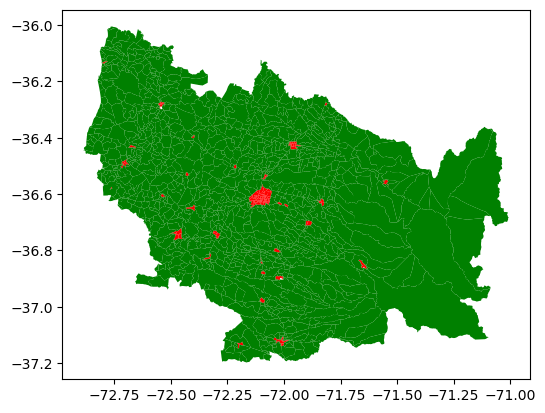

In [7]:
import matplotlib.pyplot as plt


fig=plt.figure()
ax=fig.add_subplot(1,1,1)
zonas_16.plot(color='red', ax=ax, linewidth=0.5)
loc_16.plot(color='green', ax=ax, linewidth=0.5)

In [15]:
nuble_shape = gpd.GeoDataFrame(pd.concat([zonas_16, loc_16]))


In [11]:
censo_hogares.columns

Index(['REGION', 'PROVINCIA', 'COMUNA', 'DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC',
       'NVIV', 'NHOGAR', 'TIPO_HOGAR', 'TIPO_OPERATIVO'],
      dtype='object')

In [16]:
censo_hogares_nuble = nuble_shape.merge(censo_hogares[censo_hogares.PROVINCIA==84][['DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC',
       'NVIV', 'NHOGAR', 'TIPO_HOGAR', 'TIPO_OPERATIVO']], left_on='LOC_ZON', right_on="ZC_LOC")

In [17]:
grouped=censo_hogares_nuble.groupby('ZC_LOC')

In [20]:
comunas_dict = pd.read_csv("/home/anouk/aves/data/external/censo_2017_microdato/Tablas_parametros/Microdato_Censo2017-Comunas_15R.csv", sep=";")

In [7]:
traduccion = pd.read_csv(DATA_PATH/"Tablas_parametros/microdato_censo2017-geografia.csv", sep=";")
df = traduccion[traduccion.REGION==16]
df.to_csv(DATA_PATH/"Tablas_parametros/traduccion_nuble.csv", index=False)

In [18]:
censo_hogares.to_parquet(DATA_PATH/"Hogares.parquet", index=False)

In [14]:
#censo_hogares[censo_hogares.PROVINCIA==84]['COMUNA']=census.decode_column(censo_hogares, fname=DATA_PATH/"Tablas_parametros/traduccion_nuble.csv", index_col="ID_ZONA_LOC", col_name="COMUNA", sep=',')
cols_to_replace = ["COMUNA", "REGION", "PROVINCIA"]
for col in cols_to_replace:
    censo_hogares[col] = censo_hogares['ID_ZONA_LOC'].map(traduccion.set_index('ID_ZONA_LOC')[col])

In [23]:
censo_hogares['NOM_COMUNA']=census.decode_column(censo_hogares, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="COMUNA", sep=';')


In [25]:
censo_hogares[censo_hogares.REGION ==16]

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,TIPO_HOGAR,TIPO_OPERATIVO,NOM_COMUNA
3123645,16,161,16109,1,1,1,2752,1,1,Hogar extenso,Hogar en vivienda particular,YUNGAY
3123646,16,161,16109,1,1,1,2752,2,1,Hogar unipersonal,Hogar en vivienda particular,YUNGAY
3123647,16,161,16109,1,1,1,2752,3,1,Hogar nuclear biparental con hijos,Hogar en vivienda particular,YUNGAY
3123648,16,161,16109,1,1,1,2752,4,1,Hogar extenso,Hogar en vivienda particular,YUNGAY
3123649,16,161,16109,1,1,1,2752,5,1,Hogar extenso,Hogar en vivienda particular,YUNGAY
...,...,...,...,...,...,...,...,...,...,...,...,...
3287656,16,161,16101,99,1,999,4633,59,1,Hogar sin núcleo,Hogar en vivienda particular,CHILLÁN
3287657,16,161,16101,99,1,999,4633,60,1,No aplica,Operativo personas en tránsito (no es hogar),CHILLÁN
3287658,16,161,16101,99,1,999,4633,61,1,Hogar unipersonal,Hogar en vivienda particular,CHILLÁN
3287659,16,161,16101,99,1,999,4633,62,1,Hogar compuesto,Hogar en vivienda particular,CHILLÁN


In [26]:
df_p = pd.read_parquet(DATA_PATH/"Hogares.parquet", columns=["COMUNA", "TIPO_OPERATIVO"])
df_p

,COMUNA,TIPO_OPERATIVO
0,15202,Hogar en vivienda particular
1,15202,Hogar en vivienda particular
2,15202,Hogar en vivienda particular
3,15202,Hogar en vivienda particular
4,15202,Hogar en vivienda particular
...,...,...
5664673,1101,Hogar en vivienda particular
5664674,1101,Hogar en vivienda particular
5664675,1101,Hogar en vivienda particular
5664676,1101,Hogar en vivienda particular
